<a href="https://colab.research.google.com/github/truongtommy/nyu-python-public-policy/blob/master/HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [16]:
data_311 = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv', header='infer')
data_311.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20,22,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
0,0,0,39888071,08/01/2018 12:00:10 AM,08/01/2018 01:52:46 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Other,10029,200 EAST 109 STREET,EAST 109 STREET,3 AVENUE,2 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:00:10 AM,The mobile outreach response team offered serv...,08/01/2018 01:52:46 AM,11 MANHATTAN,1.016560e+09,MANHATTAN,1000049.0,228317.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.793339,-73.942942,"(40.79333937834769, -73.9429417746998)",111.0
1,1,1,39889166,08/01/2018 12:00:26 AM,08/18/2018 10:46:43 AM,HPD,Department of Housing Preservation and Develop...,DOOR/WINDOW,DOOR,RESIDENTIAL BUILDING,10031,528 WEST 136 STREET,WEST 136 STREET,NaN,NaN,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,NaN,The Department of Housing Preservation and Dev...,08/18/2018 10:46:43 AM,09 MANHATTAN,1.019880e+09,MANHATTAN,997239.0,238074.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.820124,-73.953071,"(40.82012422332215, -73.9530712339799)",109.0
2,2,2,39882869,08/01/2018 12:00:54 AM,08/01/2018 12:49:55 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0
3,3,3,39894246,08/01/2018 12:01:00 AM,08/02/2018 10:30:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10010,NaN,NaN,NaN,NaN,5 AVENUE,EAST 21 STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,08/02/2018 10:30:00 PM,05 MANHATTAN,NaN,MANHATTAN,986878.0,208974.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)",105.0
4,4,4,39881329,08/01/2018 12:01:00 AM,08/05/2018 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11413,121-28 198 STREET,198 STREET,120 AVENUE,122 AVENUE,NaN,NaN,ADDRESS,Springfield Gardens,NaN,NaN,Closed,NaN,NaN,08/05/2018 12:00:00 AM,12 QUEENS,4.126830e+09,QUEENS,1053308.0,190084.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)",412.0


In [15]:
count_parks = pd.read_csv('/content/drive/My Drive/HW7/count_parks.csv', header='infer')
count_parks.head()


,borocd,count_parks
0,101,28
1,102,16
2,103,39
3,104,23
4,105,10


In [24]:
homeless_filter = data_311.complaint_type == "Homeless Encampment"
homeless_filter.head()

0    False
1    False
2    False
3    False
4    False
Name: complaint_type, dtype: bool

In [40]:
homeless_data = data_311[homeless_filter]
homeless_data.head(20)


,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
542,569,569,39894121,08/01/2018 07:04:32 AM,08/01/2018 07:47:41 AM,NYPD,New York City Police Department,Homeless Encampment,NaN,Street/Sidewalk,10017,711 3 AVENUE,3 AVENUE,EAST 44 STREET,EAST 45 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,08/01/2018 03:04:32 PM,The Police Department responded to the complai...,08/01/2018 07:35:43 AM,06 MANHATTAN,1.013180e+09,MANHATTAN,991657.0,213388.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.752374,-73.973266,"(40.75237419947105, -73.9732660072224)",106.0
744,777,777,39898363,08/01/2018 08:05:45 AM,08/01/2018 02:33:43 PM,NYPD,New York City Police Department,Homeless Encampment,NaN,Street/Sidewalk,10011,77 WEST 15 STREET,WEST 15 STREET,5 AVENUE,AVENUE OF THE AMERICAS,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,08/01/2018 04:05:45 PM,The Police Department responded and upon arriv...,08/01/2018 02:33:43 PM,05 MANHATTAN,1.008170e+09,MANHATTAN,985341.0,208126.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.737934,-73.996063,"(40.73793436227037, -73.99606312073887)",105.0
751,784,784,39895600,08/01/2018 08:06:14 AM,08/01/2018 12:39:40 PM,NYPD,New York City Police Department,Homeless Encampment,NaN,Street/Sidewalk,10003,NaN,NaN,NaN,NaN,EAST 9 STREET,BROADWAY,INTERSECTION,NEW YORK,NaN,Precinct,Closed,08/01/2018 04:06:14 PM,The Police Department responded to the complai...,08/01/2018 12:39:40 PM,02 MANHATTAN,NaN,MANHATTAN,986489.0,205660.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.731166,-73.991921,"(40.73116558364491, -73.99192137736195)",102.0
781,814,814,39895565,08/01/2018 08:13:52 AM,08/01/2018 02:33:43 PM,NYPD,New York City Police Department,Homeless Encampment,NaN,Street/Sidewalk,10001,WEST 27 STREET,WEST 27 STREET,6 AVENUE,7 AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,08/01/2018 04:13:52 PM,The Police Department responded and upon arriv...,08/01/2018 02:33:43 PM,05 MANHATTAN,NaN,MANHATTAN,986358.0,211071.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.746017,-73.992392,"(40.746017469450685, -73.99239234794368)",105.0
810,845,845,39888598,08/01/2018 08:19:41 AM,08/01/2018 11:49:28 AM,NYPD,New York City Police Department,Homeless Encampment,NaN,Street/Sidewalk,11214,1729 86 STREET,86 STREET,BAY 16 STREET,BAY 17 STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 04:19:41 PM,The Police Department responded and upon arriv...,08/01/2018 11:49:28 AM,11 BROOKLYN,3.063430e+09,BROOKLYN,983171.0,160793.0,PHONE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.608016,-74.003886,"(40.6080159309538, -74.00388600008407)",311.0
885,924,924,39888632,08/01/2018 08:34:56 AM,08/01/2018 03:15:46 PM,NYPD,New York City Police Department,Homeless Encampment,NaN,Street/Sidewalk,10001,401 WEST 25 STREET,WEST 25 STREET,9 AVENUE,10 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,08/01/2018 04:34:56 PM,The Police Department responded to the complai...,08/01/2018 03:15:46 PM,04 MANHATTAN,1.007238e+09,MANHATTAN,984120.0,211724.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.747810,-74.000469,"(40.74781004076952, -74.00046917522656)",104.0
922,963,963,39898335,08/01/2018 08:40:20 AM,08/01/2018 04:57:30 PM,NYPD,New York City Police Department,Homeless Encampment,NaN,Park/Playground,10026,NaN,NaN,NaN,NaN,WEST 110 STREET,LENOX AVENUE,INTERSECTION,NEW YORK,NaN,Precinct,Closed,08/

This analysis is looking to find if there is a significant correlation between the count of parks in a given borocd and the number of homeless encampment complaints. The hypothesis is that there may be a positive correlation between public park spaces and the number of complaints for homelessness. Parks that are under survellianced/maintained may experience homeless encampment more so than areas without any parks. 

In [47]:
homeless_count = homeless_data.groupby(['borocd']).size().reset_index(name='count_homeless')
homeless_count.head()

,borocd,count_homeless
0,101.0,147
1,102.0,407
2,103.0,304
3,104.0,483
4,105.0,810


In [48]:
merge_data = pd.merge(homeless_count,count_parks, on= 'borocd' ,how = 'outer')
merge_data.head()

,borocd,count_homeless,count_parks
0,101.0,147,28
1,102.0,407,16
2,103.0,304,39
3,104.0,483,23
4,105.0,810,10


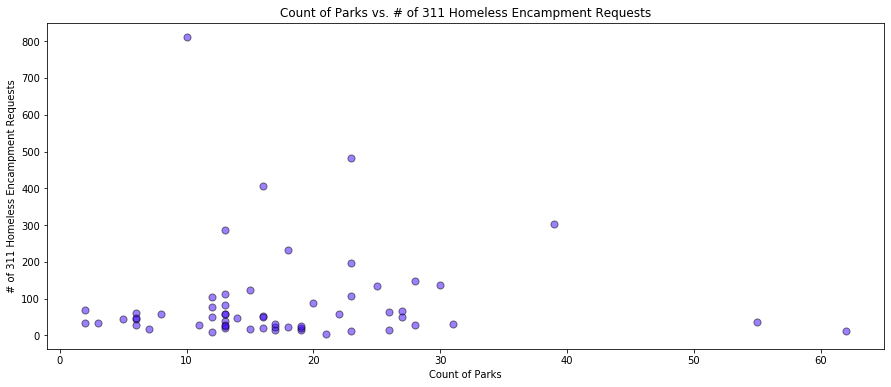

In [58]:
plt.figure(figsize=(15, 6))

plt.scatter(
    np.array(merge_data.count_parks), 
    np.array(merge_data.count_homeless), 
    s=50, 
    c='#3d03fc', 
    edgecolors='black', 
    alpha=0.5) 

plt.title('Count of Parks vs. # of 311 Homeless Encampment Requests')
plt.xlabel('Count of Parks')
plt.ylabel('# of 311 Homeless Encampment Requests')

plt.show()

In [61]:
y = np.array(merge_data.count_parks)

# x = independent variable (population) with a constant added
x = np.array(merge_data.count_homeless)
x = sm.add_constant(x)

print(x)

model = sm.OLS(y, x).fit()

# Print out the statistics

print(model.summary())

[[  1. 147.]
 [  1. 407.]
 [  1. 304.]
 [  1. 483.]
 [  1. 810.]
 [  1. 232.]
 [  1. 286.]
 [  1. 196.]
 [  1.  48.]
 [  1.  83.]
 [  1.  67.]
 [  1. 106.]
 [  1. 105.]
 [  1.  20.]
 [  1.  15.]
 [  1.  30.]
 [  1.  19.]
 [  1.  21.]
 [  1.  23.]
 [  1.  12.]
 [  1.  28.]
 [  1.   9.]
 [  1.  17.]
 [  1.  44.]
 [  1. 134.]
 [  1. 137.]
 [  1. 123.]
 [  1. 114.]
 [  1.  50.]
 [  1.  59.]
 [  1.  54.]
 [  1.  57.]
 [  1.  33.]
 [  1.  39.]
 [  1.  45.]
 [  1.  60.]
 [  1.  50.]
 [  1.  68.]
 [  1.  29.]
 [  1.  14.]
 [  1.  47.]
 [  1.  27.]
 [  1.  57.]
 [  1.  88.]
 [  1.  57.]
 [  1.  76.]
 [  1.  29.]
 [  1.  29.]
 [  1.  50.]
 [  1.  22.]
 [  1.  35.]
 [  1.  30.]
 [  1.   4.]
 [  1.  65.]
 [  1.  17.]
 [  1.  27.]
 [  1.  37.]
 [  1.  14.]
 [  1.  12.]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0

In [62]:
p = model.params # intercept and coefficient
print('parameters:', p)

r2 = model.rsquared
print('R2:', r2)

parameters: [1.76463236e+01 1.29539875e-03]
R2: 0.0002503247203412551


In [63]:
label = 'y = ' + str(round(p[1],2)) + 'x + ' + str(round(p[0],2)) + '; R2 = ' + str(round(r2,3))
print(label)


y = 0.0x + 17.65; R2 = 0.0


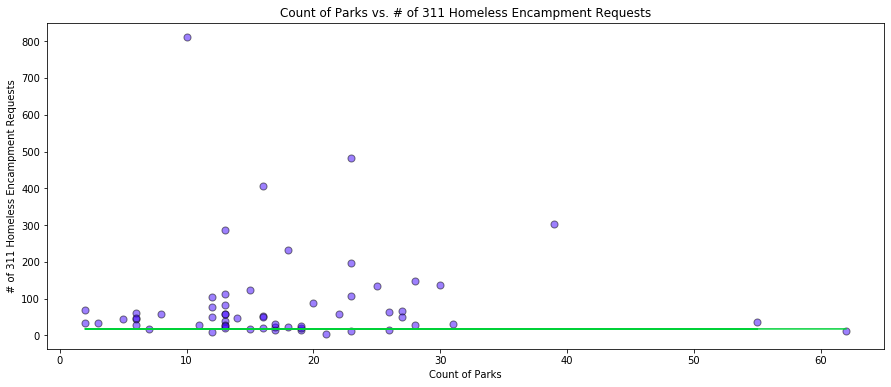

In [66]:

x_dummy = np.array(merge_data.count_parks)

plt.figure(figsize=(15, 6))

plt.scatter(
    np.array(merge_data.count_parks), 
    np.array(merge_data.count_homeless), 
    s=50, 
    c='#3d03fc', 
    edgecolors='black', 
    alpha=0.5)

plt.plot(
    x_dummy, 
    p[0] + p[1] * x_dummy,
    c='#00d138', 
    label=label)

plt.title('Count of Parks vs. # of 311 Homeless Encampment Requests')
plt.xlabel('Count of Parks')
plt.ylabel('# of 311 Homeless Encampment Requests')

plt.show()

There is no meaningful correlation between the number of parks in a given borocd and the number of 311 complaint requests in regard to homeless encampment. This is shown by the R value of 0.00. As shown on the scatter plot, the points show no significant positive or negative correlation, rather are disbursed in random clusters. It seems as though the number of complaints are fairly evenly distributed throughout the borocds regardless of number of parks. Therefore, we can conclude that the number of parks does not influence the number of homeless encampment. 